#### 升级或安装qiskit2quafu库

In [ ]:
# 安装使用这个：
! pip install qiskit2quafu

In [ ]:
# 升级使用这个：
! pip install --upgrade qiskit2quafu

#### 导入所需的库

In [1]:
from qiskit.circuit.library import TwoLocal
from qiskit2quafu import quafuVQE,draw_plot
import numpy as np

#### 调整输入格式，设置ansatz电路，设置token

In [3]:
# 将输入调整为如下形式:
# [(参数1，哈密顿量1),(参数2，哈密顿量2),...]
# 具体可参照如下变量H_op：
H_op = [(0.39793742484318045, 'YZ'), (-0.39793742484318045, 'ZI'),
        (-0.01128010425623538, 'ZZ'), (0.18093119978423156, 'XX')]

# 定义ansatz电路
ansatz = TwoLocal(2, rotation_blocks='ry', entanglement_blocks='cx')

# 设置初始参数，推荐赋初始值
# 也可以使用随机初始化的值，但是优化效果不佳
params = np.array([1.22253725, 0.39053752, 0.21462153, 5.48308027,
                   2.06984514, 3.65227416, 4.01911194, 0.35749589])

# 设置用户使用的api_token
api_token='wtx_48SZWeyxtWaLsaQ8fOmix1TX0Bg66ZcENXIrsul.QfzgjM1YTO5kjNxojIwhXZiwCMxMjM6ICZpJye.9JiN1IzUIJiOicGbhJCLiQ1VKJiOiAXe0Jye'

#### 调用函数开始优化

In [4]:
# 调用qiskit2quafu中的quafuVQE
# 根据资源负载情况设置后端，默认为ScQ-P10
# 使用ScQ-P10的情况下，优化时间约50分钟
exp,res=quafuVQE(H_op,ansatz,api_token,params,backend='ScQ-P10')

# 随机初始化时设置random_param为True
# 调用示例如下：
# exp,res=quafuVQE(H_op,ansatz,params=None,random_param=True,api_token=api_token,backend='ScQ-P10')

# 打印结果
print(exp,res)

c:\Users\ladium\AppData\Local\Programs\Python\Python39\lib\site-packages\quafu\users\userapi.py:52: UserWarning: The argument 'apitoken' in this function will be deprecated in the future, please set api token by providing 'api_token' or 'token_dir' when initialize User().
  warnings.warn("The argument 'apitoken' in this function will be deprecated "


Quafu initialized.
-0.5575831623262708 [1.02189661 1.69095408 0.4070063  5.84233597 2.32417659 3.25354681
 4.08810835 0.45291258]


#### 绘制结果

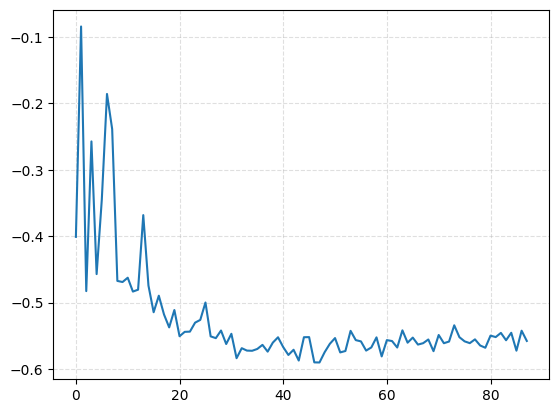

In [6]:
# 调用qiskit2quafu中的函数绘制收敛过程图
draw_plot('log.json')